In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("/content/delivery_time.csv")

In [ ]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [ ]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [ ]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Correlation

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<ipython-input-27-2b17bb6b1b9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

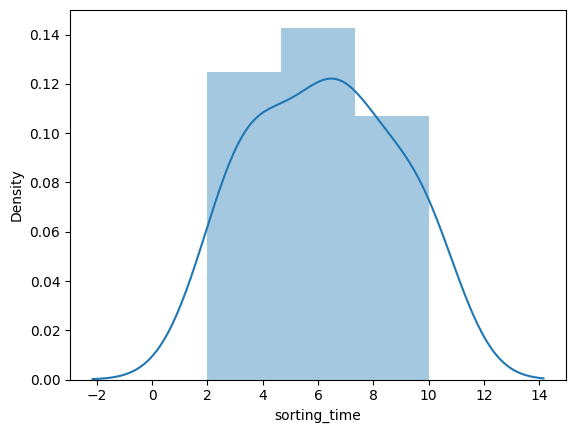

In [ ]:
sns.distplot(data['sorting_time'])

<ipython-input-28-2eb91e11e182>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

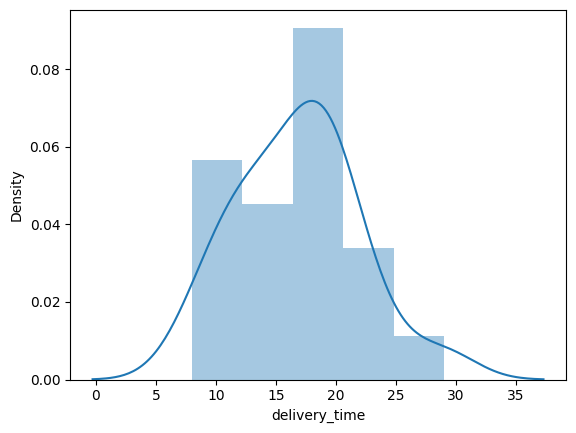

In [ ]:
sns.distplot(data['delivery_time'])

Model building 

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

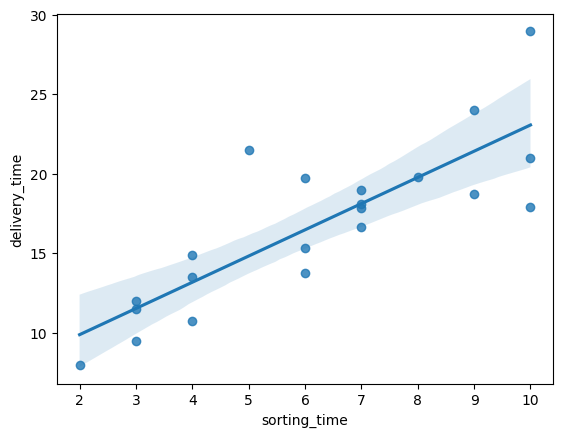

In [ ]:
sns.regplot(x="sorting_time", y="delivery_time", data=data);

In [ ]:
print(model.tvalues)
print(model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [ ]:
newdata=pd.Series([6,9])
newdata

0    6
1    9
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [ ]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64